In [72]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time

from bs4 import BeautifulSoup
import pandas as pd

driver = webdriver.Firefox()
driver.get("https://messari.io/governor/proposal/061dc6ac-4711-45ab-9168-364ba8de9693?daoSlug=uniswap-governance&daoTab=proposals")
# time.sleep(10)

# Extract the text from the element


# proposal_details = {}


In [74]:
wait = WebDriverWait(driver, 10)

# tim
# ze.sleep(10)
elements = wait.until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR,'.css-topwlp')))
votes_data = []


for button in elements:
    if button.text.startswith("VIEW ALL"):
        print(f"Found button {button.text.strip()}")
        driver.execute_script("arguments[0].click();", button)
        count_clicker = 0
        try:
            while count_clicker<10:
                
                time.sleep(4)
                load_more_button_css = ".MuiButton-outlined"
                load_more_button = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, load_more_button_css)))
                driver.execute_script("arguments[0].click();", load_more_button)
                count_clicker+=1
                
        except: 
            continue
                    
votes_data = pd.read_html(driver.page_source)

Found button VIEW ALL 53 VOTERS


In [62]:
count_clicker

2

In [68]:
votes_data[3]

,0,1,2,3,4
0,1,Blockchain at Michigan0x13bdae8c5f...196f59138548,Yes…,3.50M Votes,13.57%
1,2,MonetSupply0x8d07d225a7...f49180e6a265,Yes…,3.30M Votes,12.80%
2,3,0x070341aa5e...9b1a46b4961b,Yes…,3.00M Votes,11.63%
3,4,gov.avantgardefi.eth0xb49f8b8613...6044ffec7948,Yes…,2.50M Votes,9.69%
4,5,Blockchain Education Network0x66aa8bee53...e5e...,Yes…,2.50M Votes,9.69%
...,...,...,...,...,...
195,196,0x7a47a59044...6804c8352ab9,Yes…,45.60 Votes,< 0.01%
196,197,0xd8ffb163ff...713a2490f0e6,Yes…,45.60 Votes,< 0.01%
197,198,0x679d095b4c...d2e984d9913b,Yes…,45.60 Votes,< 0.01%
198,199,0xa465a928a9...8d6c8d95d4f8,Yes…,45.41 Votes,< 0.01%


In [64]:
for element in elements:
    print(element.text.strip())

In [48]:
len(elements)

5

<html class="theme-night" lang="en">
 <head>
  <style data-dynamic-styles-ar="">
   /** arPreserve html { box-sizing: border-box; color-scheme: dark; }*, ::before, ::after { box-sizing: inherit; }strong, b { font-weight: 600; }body { margin: 0px; color: rgb(243, 244, 246); font-size: 0.875rem; font-weight: 400; font-family: Avenir, system-ui, sans-serif; line-height: 1.5; background-color: rgb(8, 10, 12); }@media print {
  body { background-color: rgb(255, 255, 255); }
}body::backdrop { background-color: rgb(8, 10, 12); }body { font-size: 0.875rem; line-height: 1.43; letter-spacing: 0.01071em; }@keyframes mui-auto-fill {
0% { display: block; }
}@keyframes mui-auto-fill {
0% { display: block; }
}@keyframes mui-auto-fill-cancel {
0% { display: block; }
}@keyframes mui-auto-fill-cancel {
0% { display: block; }
}.css-zf0iqh { display: flex; flex-direction: column; min-height: 100vh; }.css-1mioboa { font-size: 0.875rem; font-weight: 600; font-family: Avenir, system-ui, sans-serif; -moz-box-
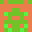
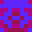
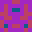
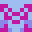
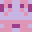
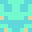
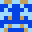
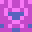
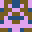

In [20]:
print(soup.prettify())

In [6]:

summary = soup.find('div', class_="MuiBox-root css-79elbk").text
print(summary)

# Check if off-chain also present
top_boxes = len(soup.find('div', class_="MuiBox-root css-1qoa196").find_all('div', class_=lambda value: value and value.startswith("MuiPaper-root MuiPaper-elevation")))
off_chain_present = False if top_boxes == 2 else True
print(off_chain_present)

print('on_chain_author',  soup.find_all('div', 'MuiBox-root css-z53l98')[0].text.replace('Author',""))
print('on_chain_start_date', soup.find_all('div', class_="MuiStep-root MuiStep-vertical css-0")[3].text)
print('on_chain_end_date',soup.find_all('div', class_="MuiStep-root MuiStep-vertical css-0")[4].text)
#Preliminary discussion
print('prelim_sentiments', soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text)
print('prem_other_details', soup.find('div',id= "preliminary-discussion").find('div').find('div').text)
# print(prem_other_details)
# elements = prem_other_details.split(" by ")
# element1 = elements[0]
# element2 = elements[1].split(" on ")[0]
# element3 = elements[1].split(" on ")[1]
# row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]

# Adding on-chain votes
on_chain_votes = soup.select(".css-178yklu .css-15j76c0:nth-child(1)")[0]
on_chain_option_list = [f"{element}%" for element in on_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
    .replace('Results',"").split("%")][:-1]
option_dict = {}
for index, option in enumerate(on_chain_option_list, start=1):
    option_dict[f"on_chain_Option_{index}"] = option

print(option_dict)       
# option_dict = pd.Series(option_dict)
# row = pd.concat([row,option_dict])

#off chain elements extract 
if off_chain_present:            
    key_info_elements = soup.find_all('div', 'MuiBox-root css-z53l98')
    print('off_chain_author', key_info_elements[3].text.replace('Author',""))
    print('off_chain_start_date', key_info_elements[8].text)
    print('off_chain_end_date',key_info_elements[9].text)
    off_chain_votes = soup.select(".css-h5fkc8+ .css-178yklu .css-15j76c0:nth-child(1)")[0]
    off_chain_option_list = [f"{element}%" for element in off_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
        .replace('Results',"").split("%")][:-1]
    option_dict = {}
    for index, option in enumerate(off_chain_option_list, start=1):
        option_dict[f"Off_Chain_Option_{index}"] = option
        
    print(option_dict)

SummaryThis proposal aims to approve an operational update of different oracle aspects for the sake of consistency across instances of Aave. The update will unify the pricing of WBTC based on a WBTC feed, activate the Price Oracle Sentinel on Aave V3 Optimism, and unify all LST pricing methods to use official exchange rates on all generalized price syncs.
False
on_chain_author bgdlabs.eth0xf71f...c61e02
on_chain_start_date QUEUEDJun 2, 2023
on_chain_end_date EXECUTEDJun 3, 2023
prelim_sentiments Neutral Sentiment
prem_other_details Started on May 25, 2023 by BGD Labs on Aave Forum
{'on_chain_Option_1': 'For0.65M AAVE100%', 'on_chain_Option_2': 'Against0%'}


In [ ]:
https://messari.io//governor/proposal/c6ad38f1-bd8c-406c-a30f-8f36341066a1?daoSlug=aave-governance&daoTab=proposals
https://messari.io//governor/proposal/9238f54d-7b6a-415a-a4d5-54d5023ac3ad?daoSlug=aave-governance&daoTab=proposals
https://messari.io//governor/proposal/4fcd5d77-f3b7-4ee3-8d4c-2ef81aa0eb32?daoSlug=aave-governance&daoTab=proposals
https://messari.io//governor/proposal/5a72bdd1-2eeb-4185-b278-5651138d1373?daoSlug=aave-governance&daoTab=proposals


In [81]:
row = {}
summary = soup.find('div', class_="MuiBox-root css-79elbk").text
row['summary'] = summary
date = driver.find_element(By.XPATH, "/html/body/div[1]/div/div/div[3]/div/div[2]/div[1]/div[2]/div[2]/div[1]/div[2]").text
row['top_date'] = date
sentiments = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
row['sentiments'] = sentiments
prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
# print(prem_other_details)
elements = prem_other_details.split(" by ")
element1 = elements[0]
element2 = elements[1].split(" on ")[0]
element3 = elements[1].split(" on ")[1]
row['bottom_date'], row['author'], row['started_location'] = [element1, element2, element3]
try:
    row['votin_start_date'] = driver.find_element(By.CSS_SELECTOR,".css-iol86l+ .css-iol86l .css-z53l98:nth-child(2) .css-1okhvk8").text
    row['voting_end_date'] = driver.find_element(By.CSS_SELECTOR,".css-z53l98:nth-child(3) .jss57+ .css-1okhvk8").text
except:
    pass
options = soup.select('.css-1s50f5r+ .css-1s50f5r')
votes = max(options, key=lambda x: len(x.text))
votes = votes.text.replace("Active Vote","").replace("Cast Your Vote","").split('%')
votes.pop()
option_dict = {}
for number, vote in enumerate(votes,start=1):
    option_dict[f"option {number}"] = vote
    
option_dict = pd.Series(option_dict)
row = pd.concat([row, option_dict])
print(row)

TypeError: cannot concatenate object of type '<class 'dict'>'; only Series and DataFrame objs are valid

In [80]:
row

{'summary': 'SummaryThis proposal aims to add the native version of USDC on Arbitrum to the Aave V3 pool, replacing the bridged version (USDC.e) as the primary USDC stablecoin on Arbitrum. The onboarding strategy involves initially aligning parameters with USDC.e and gradually transitioning to more favorable conditions for the native USDC as it gains liquidity and stability.',
 'top_date': '16 hours left to vote via\nOn-Chain Vote',
 'sentiments': 'Neutral Sentiment',
 'bottom_date': 'Started on Jun 6, 2023',
 'author': 'Marc Zeller',
 'started_location': 'Aave Forum',
 'votin_start_date': 'Jun 15, 2023'}

In [24]:
import concurrent.futures

def close_overlay(driver):
    wait = WebDriverWait(driver, 10)
    button = "/html/body/div[7]/div[3]/div/div[1]/div/button"
    
    try:
        overlay_window = wait.until(EC.visibility_of_element_located((By.XPATH, button)))
        driver.execute_script("arguments[0].click();", overlay_window)
        print("Overlay window closed")
    except:
        pass
    
    return
  

def set_prelim_vote_extract(row, html, soup):
    link = row['Links']
    driver = webdriver.Firefox()        
    driver.get(link)
    time.sleep(10)
    close_overlay(driver)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    summary = soup.find('div', class_="MuiBox-root css-79elbk").text
    row['summary'] = summary
    date = driver.find_element(By.XPATH, "/html/body/div[1]/div/div/div[3]/div/div[2]/div[1]/div[2]/div[2]/div[1]/div[2]").text
    sentiments = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
    row['prelim_sentiments'] = sentiments
    prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
    # print(prem_other_details)
    elements = prem_other_details.split(" by ")
    element1 = elements[0]
    element2 = elements[1].split(" on ")[0]
    element3 = elements[1].split(" on ")[1]
    row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]
    driver.quit()
    
    return row
    
def set_off_chain_active_vote_extract(row, html, soup):
    link = row['Links']
    driver = webdriver.Firefox()        
    driver.get(link)
    time.sleep(10)
    close_overlay(driver)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    summary = soup.find('div', class_="MuiBox-root css-79elbk").text
    row['summary'] = summary
    key_info_elements = soup.find_all('div', 'MuiBox-root css-z53l98')
    row['off_chain_author'] = key_info_elements[0].text.replace('Author',"")
    row['off_chain_start_date'] = key_info_elements[5].text
    row['off_chain_end_date'] = key_info_elements[6].text
    #Preliminary discussion
    row['prelim_sentiments'] = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
    prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
    # print(prem_other_details)
    elements = prem_other_details.split(" by ")
    element1 = elements[0]
    element2 = elements[1].split(" on ")[0]
    element3 = elements[1].split(" on ")[1]
    row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]
    off_chain_votes = soup.select(".css-1s50f5r")[-1]
    off_chain_option_list = off_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","").split("%")[:-1]
    option_dict = {}
    for index, option in enumerate(off_chain_option_list, start=1):
        option_dict[f"Off_Chain_Option_{index}"] = option
        
    option_dict = pd.Series(option_dict)
    row = pd.concat([row,option_dict])
    driver.quit() 
    return row

def set_off_chain_remaining_extract(row, html, soup):
    link = row['Links']
    driver = webdriver.Firefox()        
    driver.get(link)
    time.sleep(10)
    close_overlay(driver)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    summary = soup.find('div', class_="MuiBox-root css-79elbk").text
    row['summary'] = summary
    key_info_elements = soup.find_all('div', 'MuiBox-root css-z53l98')
    row['off_chain_author'] = key_info_elements[0].text.replace('Author',"")
    row['off_chain_start_date'] = key_info_elements[5].text
    row['off_chain_end_date'] = key_info_elements[6].text
    #Preliminary discussion
    try:
        row['prelim_sentiments'] = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
        prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
        # print(prem_other_details)
        elements = prem_other_details.split(" by ")
        element1 = elements[0]
        element2 = elements[1].split(" on ")[0]
        element3 = elements[1].split(" on ")[1]
        row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]
    except:
        pass
    
    off_chain_votes = soup.select(".css-178yklu .css-15j76c0:nth-child(1) div")[0]
    off_chain_option_list = [f"{element}%" for element in off_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","").split("%")][:-1]
    option_dict = {}
    for index, option in enumerate(off_chain_option_list, start=1):
        option_dict[f"Off_Chain_Option_{index}"] = option
        
    option_dict = pd.Series(option_dict)
    row = pd.concat([row,option_dict])
    driver.quit() 
    return row       

def set_temp_check_extract(row, html, soup):
    link = row['Links']
    driver = webdriver.Firefox()        
    driver.get(link)
    time.sleep(10)
    close_overlay(driver)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    summary = soup.find('div', class_="MuiBox-root css-79elbk").text
    row['summary'] = summary
    key_info_elements = soup.find_all('div', 'MuiBox-root css-z53l98')
    row['temp_check_author'] = key_info_elements[0].text.replace('Author',"")
    row['temp_check_start_date'] = key_info_elements[5].text
    row['temp_check_end_date'] = key_info_elements[6].text
    #Preliminary discussion
    try:
        row['prelim_sentiments'] = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
        prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
        # print(prem_other_details)
        elements = prem_other_details.split(" by ")
        element1 = elements[0]
        element2 = elements[1].split(" on ")[0]
        element3 = elements[1].split(" on ")[1]
        row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]
    except:
        pass
    temp_check_votes = soup.select(".css-178yklu .css-15j76c0:nth-child(1)")[0]
    temp_check_option_list = [f"{element}%" for element in temp_check_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
        .replace('Results',"").split("%")][:-1]
    option_dict = {}
    for index, option in enumerate(temp_check_option_list, start=1):
        option_dict[f"temp_check_Option_{index}"] = option
        
    option_dict = pd.Series(option_dict)
    row = pd.concat([row,option_dict])
    driver.quit() 
    return row       

def set_on_chain_active_extract(row, html, soup):
    link = row['Links']
    driver = webdriver.Firefox()        
    driver.get(link)
    time.sleep(10)
    close_overlay(driver)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    summary = soup.find('div', class_="MuiBox-root css-79elbk").text
    row['summary'] = summary
    
    # Check if off-chain also present
    try:
        top_boxes = len(soup.find('div', class_="MuiBox-root css-1qoa196").find_all('div', class_=lambda value: value and value.startswith("MuiPaper-root MuiPaper-elevation")))
        off_chain_present = False if top_boxes == 2 else True
    except:
        off_chain_present = False
        pass
    row['on_chain_author'] = soup.find_all('div', 'MuiBox-root css-z53l98')[0].text.replace('Author',"")
    row['on_chain_start_date'] = soup.find_all('div', class_="MuiStep-root MuiStep-vertical css-0")[1].text.replace("ACTIVE VOTE","")
    row['on_chain_end_date'] = soup.find('div', class_= "MuiContainer-root MuiContainer-maxWidthMd css-1u2mkel").find('div', class_ = "MuiBox-root css-1isemmb").text
    #Preliminary discussion
    try:
        row['prelim_sentiments'] = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
        prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
        # print(prem_other_details)
        elements = prem_other_details.split(" by ")
        element1 = elements[0]
        element2 = elements[1].split(" on ")[0]
        element3 = elements[1].split(" on ")[1]
        row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]
    except:
        pass
    
    # Adding on-chain votes
    on_chain_votes = soup.select(".css-1s50f5r+ .css-1s50f5r")[0]
    on_chain_option_list = [f"{element}%" for element in on_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
        .replace('Results',"").split("%")][:-1]
    option_dict = {}
    for index, option in enumerate(on_chain_option_list, start=1):
        option_dict[f"on_chain_Option_{index}"] = option
            
    option_dict = pd.Series(option_dict)
    row = pd.concat([row,option_dict])
    driver.quit() 
    return row 

def set_on_chain_remaining_extract(row, html, soup):
    link = row['Links']
    driver = webdriver.Firefox()        
    driver.get(link)
    time.sleep(10)
    close_overlay(driver)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    summary = soup.find('div', class_="MuiBox-root css-79elbk").text
    row['summary'] = summary
    
    # Check if off-chain also present
    try:
        top_boxes = len(soup.find('div', class_="MuiBox-root css-1qoa196").find_all('div', class_=lambda value: value and value.startswith("MuiPaper-root MuiPaper-elevation")))
        off_chain_present = False if top_boxes == 2 else True
    except:
        off_chain_present = False
    
    row['on_chain_author'] = soup.find_all('div', 'MuiBox-root css-z53l98')[0].text.replace('Author',"")
    row['on_chain_start_date'] = soup.find_all('div', class_="MuiStep-root MuiStep-vertical css-0")[3].text
    row['on_chain_end_date'] = soup.find_all('div', class_="MuiStep-root MuiStep-vertical css-0")[4].text
    #Preliminary discussion
    try:
        row['prelim_sentiments'] = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
        prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
        # print(prem_other_details)
        elements = prem_other_details.split(" by ")
        element1 = elements[0]
        element2 = elements[1].split(" on ")[0]
        element3 = elements[1].split(" on ")[1]
        row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]
    except:
        pass
    
    
    # Adding on-chain votes
    on_chain_votes = soup.select(".css-178yklu .css-15j76c0:nth-child(1)")[0]
    on_chain_option_list = [f"{element}%" for element in on_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
        .replace('Results',"").split("%")][:-1]
    option_dict = {}
    for index, option in enumerate(on_chain_option_list, start=1):
        option_dict[f"on_chain_Option_{index}"] = option
            
    option_dict = pd.Series(option_dict)
    row = pd.concat([row,option_dict])
    
    
    #off chain elements extract 
    if off_chain_present:            
        key_info_elements = soup.find_all('div', 'MuiBox-root css-z53l98')
        row['off_chain_author'] = key_info_elements[3].text.replace('Author',"")
        row['off_chain_start_date'] = key_info_elements[8].text
        row['off_chain_end_date'] = key_info_elements[9].text
        off_chain_votes = soup.select(".css-h5fkc8+ .css-178yklu .css-15j76c0:nth-child(1)")[0]
        off_chain_option_list = [f"{element}%" for element in off_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
            .replace('Results',"").split("%")][:-1]
        option_dict = {}
        for index, option in enumerate(off_chain_option_list, start=1):
            option_dict[f"Off_Chain_Option_{index}"] = option
            
        option_dict = pd.Series(option_dict)
        row = pd.concat([row,option_dict])
    
    driver.quit()
    return row
    
def set_on_chain_failed_extract(row, html, soup):
    link = row['Links']
    driver = webdriver.Firefox()        
    driver.get(link)
    time.sleep(10)
    close_overlay(driver)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    summary = soup.find('div', class_="MuiBox-root css-79elbk").text
    row['summary'] = summary
    
    # Check if off-chain also present
    prelim_discussion_present = True
    try:
        top_boxes = len(soup.find('div', class_="MuiBox-root css-1qoa196").find_all('div', class_=lambda value: value and value.startswith("MuiPaper-root MuiPaper-elevation")))
        off_chain_present = False if top_boxes == 2 else True
    except:
        off_chain_present = False
        prelim_discussion_present = False
    
    row['on_chain_author'] = soup.find_all('div', 'MuiBox-root css-z53l98')[0].text.replace('Author',"")
    row['on_chain_start_date'] = soup.find_all('div', class_="MuiStep-root MuiStep-vertical css-0")[4].text
    row['on_chain_end_date'] = soup.find_all('div', class_="MuiStep-root MuiStep-vertical css-0")[5].text
    #Preliminary discussion
    try:
        row['prelim_sentiments'] = soup.find('div',id= "preliminary-discussion").find('div', class_="MuiBox-root css-70qvj9").text
        prem_other_details = soup.find('div',id= "preliminary-discussion").find('div').find('div').text
        # print(prem_other_details)
        elements = prem_other_details.split(" by ")
        element1 = elements[0]
        element2 = elements[1].split(" on ")[0]
        element3 = elements[1].split(" on ")[1]
        row['prelim_discussion_start_date'], row['prelim_author'], row['prelim_location'] = [element1, element2, element3]
    except:
        pass
    
    # Adding on-chain votes
    on_chain_votes = soup.select(".css-178yklu .css-15j76c0:nth-child(1)")[0]
    on_chain_option_list = [f"{element}%" for element in on_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
        .replace('Results',"").split("%")][:-1]
    option_dict = {}
    for index, option in enumerate(on_chain_option_list, start=1):
        option_dict[f"on_chain_Option_{index}"] = option
            
    option_dict = pd.Series(option_dict)
    row = pd.concat([row,option_dict])
    
    #off chain elements extract 
    if off_chain_present:            
        key_info_elements = soup.find_all('div', 'MuiBox-root css-z53l98')
        row['off_chain_author'] = key_info_elements[3].text.replace('Author',"")
        row['off_chain_start_date'] = key_info_elements[8].text
        row['off_chain_end_date'] = key_info_elements[9].text
        off_chain_votes = soup.select(".css-h5fkc8+ .css-178yklu .css-15j76c0:nth-child(1)")[0]
        off_chain_option_list = [f"{element}%" for element in off_chain_votes.text.replace('Active Vote',"").replace("Cast Your Vote","")\
            .replace('Results',"").split("%")][:-1]
        option_dict = {}
        for index, option in enumerate(off_chain_option_list, start=1):
            option_dict[f"Off_Chain_Option_{index}"] = option
            
        option_dict = pd.Series(option_dict)
        row = pd.concat([row,option_dict])    
    
    
    
    driver.quit() 
    return row 

def function_for_threading(data):
    result, row, index, name = data
    stage = row['Stage']
    status = row['Status']
    print(f"Index{index}*** {stage}*** {status} processing. {row['Proposal']}***")
    
    html = soup = ""
     
    if stage == 'Preliminary Discussion':
        updated_row = set_prelim_vote_extract(row, html, soup)
        for feature, value in updated_row.items():
            result.loc[index, feature] = value
    elif stage =='Off-Chain Vote' and status in ['Active Vote','Canceled']:
        updated_row = set_off_chain_active_vote_extract(row, html, soup)
        for feature, value in updated_row.items():
            result.loc[index, feature] = value
    elif stage =='Off-Chain Vote' and status in ['Succeeded','Failed']:
        updated_row = set_off_chain_remaining_extract(row, html, soup)
        for feature, value in updated_row.items():
            result.loc[index, feature] = value
    elif stage == 'Off-Chain Vote':
        print(f"*** Not extracted for proposal {row['Proposal']}")
    
    elif stage == 'Temperature Check' and status in ['Succeeded','Failed']:
        updated_row = set_temp_check_extract(row, html, soup)
        for feature, value in updated_row.items():
            result.loc[index, feature] = value
    elif stage == 'Temperature Check':
        print(f"*** Not extracted for proposal {row['Proposal']}")
        
    elif stage =="On-Chain Vote" and status == "Active Vote":
        updated_row = set_on_chain_active_extract(row, html, soup)
        for feature, value in updated_row.items():
            result.loc[index, feature] = value
    elif stage =="On-Chain Vote" and status in ["Canceled", "Executed"]:
        updated_row = set_on_chain_remaining_extract(row, html, soup)
        for feature, value in updated_row.items():
            result.loc[index, feature] = value
    elif stage =="On-Chain Vote" and status in ["Failed"]:
        updated_row = set_on_chain_failed_extract(row, html, soup)
        for feature, value in updated_row.items():
            result.loc[index, feature] = value
    else:
            print(f"{row['Proposal']} not processed. Check if use case defined")        
    
    # except:
    #     print(f"{row['Proposal']} has an error. Need to check")
        
        
        # print(result.iloc[:5,:])  
        # input("Press enter")
            
    result.to_excel(f"{name}.xlsx")
    
def update_set_wise_details(result, name):
    # for index, row in result.iterrows():
    #     data = [result, row, index]
    #     function_for_threading(data)
    for index, row in result.iterrows():
        data = [result, row, index, name ]
        function_for_threading(data)  
                
    

In [25]:
import pandas as pd

df = pd.read_excel("debug.xlsx")

df_row_problem = df[(df['Stage']=="Off-Chain Vote") & (df['Status']=="Succeeded")]
# print(df_row_problem.columns)

update_set_wise_details(df, "debug_new")



Index0*** On-Chain Vote*** Executed processing. [Revote] Allo Season 18 Budget RequestGitcoin DAO***
Index1*** On-Chain Vote*** Executed processing. [Revote] Gitcoin Passport Season 18 Budget RequestGitcoin DAO***
Index2*** On-Chain Vote*** Active Vote processing. Top Up COMP Rewards on Compound V3 (164)Compound DAO***


In [14]:
import os,time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

# # Set the folder path to scan
# folder_path = './proposal_extract'

# # Get a list of all XLSX files in the folder
# coin_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]


links = [
    'https://messari.io/governor/proposal/32f122ab-aaf5-470f-976c-a1ab4f289ad2?daoSlug=aave-governance&daoTab=proposals'
    # ,'https://messari.io/governor/proposal/c9eaf0a3-9bbe-4d7f-9dd8-ec782ffdae0b?daoSlug=aave-governance&daoTab=proposals'
]
# # Iterate through each XLSX file
# for file in coin_files[0:1]:
#     file_path = os.path.join(folder_path, file)
    
    # Convert Excel file to DataFrame
    # df = pd.read_excel(file_path)
    
    # Iterate through each row
    # for index, row in df.iterrows():
    #     link = row['Links']
votes_data = []    
for link in links:
    
    # Open webpage using Selenium
    driver = webdriver.Firefox()  # Assuming you're using Chrome WebDriver
    driver.get(link)
    time.sleep(10)
    
    wait = WebDriverWait(driver, 10)

    elements = driver.find_elements(By.CSS_SELECTOR,'.css-topwlp')



    for button in elements:
        click_counter = 0
        if button.text.startswith("VIEW ALL"):
            driver.execute_script("arguments[0].click();", button)
            try:
                while click_counter<10:
                    
                    load_more_button_css = ".css-17rg95g"
                    load_more_button = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, load_more_button_css)))
                    driver.execute_script("arguments[0].click();", load_more_button)
                    click_counter+=1
            except: 
                votes_data.append(pd.read_html(driver.page_source))
                break
    # if index>20:
    #     break
    
    # Close the WebDriver
    driver.quit()


In [22]:
# votes_data = pd.read_html(driver.page_source)
votes_data[0][0]

,0,1,2,3
0,0x070341aa5e...9b1a46b4961b,…,108.95K Votes,25.97%
1,flipsidecrypto.eth0x62a43123fe...17627996816a,…,82.83K Votes,19.74%
2,Blockchain at Michigan0x13bdae8c5f...196f59138548,…,81.79K Votes,19.50%
3,lbsblockchain.eth0xb83b3e9c8e...7a3bd1fbcf5c,…,81.41K Votes,19.41%
4,wintermutegovernance.eth0xb933aee47c...39fe378...,…,41.67K Votes,9.93%
